In [50]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Practica').getOrCreate()


In [51]:
gps=spark.read.options(header=True,inferSchema=True).csv("C:\\Users\\angel\\Documents\\big\\Datos\\p3\\gps_data.csv")


In [52]:
data=spark.read.options(header=True,inferSchema=True).csv("C:\\Users\\angel\\Documents\\big\\Datos\\p3\\C82E18F7B0E4.csv")


In [53]:
gps.printSchema()

root
 |-- RTC Time (Unix): long (nullable = true)
 |-- GPS Date Time: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Altitude: double (nullable = true)
 |-- Speed: double (nullable = true)
 |-- Course: double (nullable = true)
 |-- HDOP: double (nullable = true)
 |-- Fix Status: integer (nullable = true)
 |-- Satellites: integer (nullable = true)



In [54]:
gps=gps.select("RTC Time (Unix)","Latitude","Longitude","Altitude",'Speed',"Course","Satellites")

In [55]:
gps.show()

+---------------+--------+---------+--------+-----+------+----------+
|RTC Time (Unix)|Latitude|Longitude|Altitude|Speed|Course|Satellites|
+---------------+--------+---------+--------+-----+------+----------+
|           3604|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3608|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3612|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3616|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3620|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3651|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3657|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3661|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3668|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3675|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3679|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|           3683|   

In [56]:
data.printSchema()

root
 |-- RTC Time (Unix): long (nullable = true)
 |-- MAC Address: string (nullable = true)
 |-- Date UNIX Pot: integer (nullable = true)
 |-- Mode: integer (nullable = true)
 |-- (BMP280 Temperature: string (nullable = true)
 |-- Pressure: double (nullable = true)
 |-- Approx altitude: string (nullable = true)
 |-- AHT20 Temperature: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- PM  1.0: double (nullable = true)
 |-- PM  2.5: double (nullable = true)
 |-- PM  4.0: double (nullable = true)
 |-- PM 10: double (nullable = true)
 |-- NC  0.5: string (nullable = true)
 |-- NC  1.0: string (nullable = true)
 |-- NC  2.5: string (nullable = true)
 |-- NC  4.0: string (nullable = true)
 |-- NC 10.0): string (nullable = true)



In [57]:
data = data.withColumnRenamed("PM  2.5", "PM_2_5")

In [58]:
data = data.withColumnRenamed("RTC Time (Unix)", "time")

In [59]:
data=data.select("time","(BMP280 Temperature","Pressure","Humidity",'PM_2_5',"PM 10")

In [60]:
data.show()

+----+-------------------+--------+--------+------+-----+
|time|(BMP280 Temperature|Pressure|Humidity|PM_2_5|PM 10|
+----+-------------------+--------+--------+------+-----+
|3656|               NULL|    NULL|    NULL|  NULL| NULL|
|3656|               NULL|    NULL|    NULL|  NULL| NULL|
|3657|               NULL|    NULL|    NULL|  NULL| NULL|
|3657|               NULL|    NULL|    NULL|  NULL| NULL|
|3657|               NULL|    NULL|    NULL|  NULL| NULL|
|3657|               NULL|    NULL|    NULL|  NULL| NULL|
|3657|               NULL|    NULL|    NULL|  NULL| NULL|
|3658|               NULL|    NULL|    NULL|  NULL| NULL|
|3658|               NULL|    NULL|    NULL|  NULL| NULL|
|3658|               NULL|    NULL|    NULL|  NULL| NULL|
|3615|               NULL|    NULL|    NULL|  NULL| NULL|
|3616|               NULL|    NULL|    NULL|  NULL| NULL|
|3616|               NULL|    NULL|    NULL|  NULL| NULL|
|3616|               NULL|    NULL|    NULL|  NULL| NULL|
|3616|        

In [61]:
from pyspark.sql.functions import *

In [62]:
data = data.withColumn("Tempeture", regexp_replace(col("(BMP280 Temperature"), "[()]", "").cast("double"))

In [63]:
# Convertir la columna 'RTC Time' (que está en formato Unix) a una fecha legible
data = data.withColumn("time", from_unixtime("time", "yyyy-MM-dd HH:mm:ss"))

# Mostrar el resultado
data.show()

+-------------------+-------------------+--------+--------+------+-----+---------+
|               time|(BMP280 Temperature|Pressure|Humidity|PM_2_5|PM 10|Tempeture|
+-------------------+-------------------+--------+--------+------+-----+---------+
|1969-12-31 19:00:56|               NULL|    NULL|    NULL|  NULL| NULL|     NULL|
|1969-12-31 19:00:56|               NULL|    NULL|    NULL|  NULL| NULL|     NULL|
|1969-12-31 19:00:57|               NULL|    NULL|    NULL|  NULL| NULL|     NULL|
|1969-12-31 19:00:57|               NULL|    NULL|    NULL|  NULL| NULL|     NULL|
|1969-12-31 19:00:57|               NULL|    NULL|    NULL|  NULL| NULL|     NULL|
|1969-12-31 19:00:57|               NULL|    NULL|    NULL|  NULL| NULL|     NULL|
|1969-12-31 19:00:57|               NULL|    NULL|    NULL|  NULL| NULL|     NULL|
|1969-12-31 19:00:58|               NULL|    NULL|    NULL|  NULL| NULL|     NULL|
|1969-12-31 19:00:58|               NULL|    NULL|    NULL|  NULL| NULL|     NULL|
|196

In [64]:
# Convertir la columna 'RTC Time' (que está en formato Unix) a una fecha legible
gps = gps.withColumn("RTC Time (Unix)", from_unixtime("RTC Time (Unix)", "yyyy-MM-dd HH:mm:ss"))

# Mostrar el resultado
gps.show()

+-------------------+--------+---------+--------+-----+------+----------+
|    RTC Time (Unix)|Latitude|Longitude|Altitude|Speed|Course|Satellites|
+-------------------+--------+---------+--------+-----+------+----------+
|1969-12-31 19:00:04|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:00:08|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:00:12|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:00:16|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:00:20|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:00:51|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:00:57|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:01:01|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:01:08|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:01:15|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:01:19|     0.0|      0.

In [65]:
df_unido = data.join(gps, gps["RTC Time (Unix)"] == data["time"], "inner")

In [66]:
df_unido.show()

+-------------------+-------------------+--------+--------+------+-----+---------+-------------------+--------+---------+--------+-----+------+----------+
|               time|(BMP280 Temperature|Pressure|Humidity|PM_2_5|PM 10|Tempeture|    RTC Time (Unix)|Latitude|Longitude|Altitude|Speed|Course|Satellites|
+-------------------+-------------------+--------+--------+------+-----+---------+-------------------+--------+---------+--------+-----+------+----------+
|1969-12-31 19:00:16|             (23.47|77195.46|     0.0|  3.52| 3.52|    23.47|1969-12-31 19:00:16|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:00:16|             (24.22|78114.72|     0.0|  5.49|10.46|    24.22|1969-12-31 19:00:16|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:00:16|             (24.22|78114.72|     0.0|  5.49|10.46|    24.22|1969-12-31 19:00:16|     0.0|      0.0|     0.0| 2.14|  1.94|1074284042|
|1969-12-31 19:00:16|               NULL|    NULL|    NULL|  NULL| NUL

In [67]:
df_unido.select("RTC Time (Unix)","Tempeture","Pressure","Humidity",'PM_2_5',"PM 10","Latitude","Longitude","Altitude",'Speed',"Course","Satellites").describe().show(truncate=False, vertical=True)
 

-RECORD 0-------------------------------
 summary         | count                
 RTC Time (Unix) | 235                  
 Tempeture       | 187                  
 Pressure        | 187                  
 Humidity        | 187                  
 PM_2_5          | 187                  
 PM 10           | 187                  
 Latitude        | 235                  
 Longitude       | 235                  
 Altitude        | 235                  
 Speed           | 235                  
 Course          | 235                  
 Satellites      | 235                  
-RECORD 1-------------------------------
 summary         | mean                 
 RTC Time (Unix) | NULL                 
 Tempeture       | 23.88342245989305    
 Pressure        | 78208.24764705889    
 Humidity        | 3.763957219251336    
 PM_2_5          | 16.401016042780746   
 PM 10           | 17.325240641711233   
 Latitude        | 1.291960295175507E12 
 Longitude       | 13.786882029787195   
 Altitude       

In [68]:
total_filas = df_unido.count() 
print(f"Total de filas: {total_filas}")

Total de filas: 235


In [69]:
# Filtrar los valores atípicos con base en
percentiles_t = df_unido.approxQuantile("Tempeture", [0.01, 0.99], 0)
percentiles_h = df_unido.approxQuantile("Humidity", [0.01, 0.99], 0)
percentiles_2_5 = df_unido.approxQuantile("PM_2_5", [0.01, 0.99], 0)
percentiles_10 = df_unido.approxQuantile("PM 10", [0.01, 0.99], 0)

val_min_T, val_max_T = percentiles_t[0], percentiles_t[1] 
val_min_h, val_max_h = percentiles_h[0], percentiles_h[1] 
val_min_2, val_max_2 = percentiles_2_5[0], percentiles_2_5[1] 
val_min_10, val_max_10 = percentiles_10[0], percentiles_10[1] 

# Filtrar valores atípicos
valores_atipicos = df_unido.filter(
    (df_unido["Tempeture"] < val_min_T) | (df_unido["Tempeture"] > val_max_T) |
    (df_unido["Humidity"] < val_min_h) | (df_unido["Humidity"] > val_max_h) |
    (df_unido["PM_2_5"] < val_min_2) | (df_unido["PM_2_5"] > val_max_2) |
    (df_unido["PM 10"] < val_min_10) | (df_unido["PM 10"] > val_max_10) 
)

# Mostrar valores atípicos
valores_atipicos.show(vertical=True)

-RECORD 0----------------------------------
 time                | 1969-12-31 19:01:04 
 (BMP280 Temperature | (181.92             
 Pressure            | 209470.56           
 Humidity            | 0.0                 
 PM_2_5              | 8.98                
 PM 10               | 10.0                
 Tempeture           | 181.92              
 RTC Time (Unix)     | 1969-12-31 19:01:04 
 Latitude            | 19.503932           
 Longitude           | -99.146983          
 Altitude            | 2239.1              
 Speed               | 2.14                
 Course              | 1.94                
 Satellites          | 1074284042          
-RECORD 1----------------------------------
 time                | 2024-09-05 03:30:39 
 (BMP280 Temperature | (21.51              
 Pressure            | 78435.58            
 Humidity            | 0.0                 
 PM_2_5              | 28.51               
 PM 10               | 30.81               
 Tempeture           | 21.51    

In [70]:
df_cubo1 = df_unido.cube("time", "Latitude", "Longitude", "Speed").agg(
   avg("PM_2_5").alias("Promedio_PM_2.5"),
   avg("PM 10").alias("Promedio_PM_10"),
   avg("Tempeture").alias("Promedio_Temperatura"),
   avg("Humidity").alias("Promedio_Humedad"),
   count("*").alias("Frecuencia")
)
# Mostrar los primeros resultados del cubo
df_cubo1.count()



1978

In [71]:
df_cubo2 = df_unido.cube("time").agg(
   avg("PM_2_5").alias("Promedio_PM_2.5"),
   avg("PM 10").alias("Promedio_PM_10"),
   avg("Tempeture").alias("Promedio_Temperatura"),
   avg("Humidity").alias("Promedio_Humedad"),
   count("*").alias("Frecuencia")
)
# Mostrar los primeros resultados del cubo
df_cubo2.count()

163

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
df_cubo_sorted = df_cubo2.orderBy(desc("time"))
pdf_cubo = df_cubo_sorted.toPandas() 

In [74]:
pdf_cubo


,time,Promedio_PM_2.5,Promedio_PM_10,Promedio_Temperatura,Promedio_Humedad,Frecuencia
0,2106-02-05 18:28:15,22.120000,23.000000,25.770000,0.000000,4
1,2024-09-05 03:44:17,26.100000,27.000000,27.490000,0.000000,1
2,2024-09-05 03:44:10,26.060000,27.000000,27.460000,0.000000,1
3,2024-09-05 03:43:56,24.150000,25.000000,27.370000,0.000000,1
4,2024-09-05 03:43:45,22.970000,23.000000,27.340000,0.000000,1
...,...,...,...,...,...,...
158,1969-12-31 19:00:30,2.520000,2.520000,24.160000,0.000000,1
159,1969-12-31 19:00:27,2.580000,2.580000,24.170000,0.000000,1
160,1969-12-31 19:00:20,3.035000,3.035000,23.875000,0.000000,8
161,1969-12-31 19:00:16,4.833333,8.146667,23.970000,0.000000,32


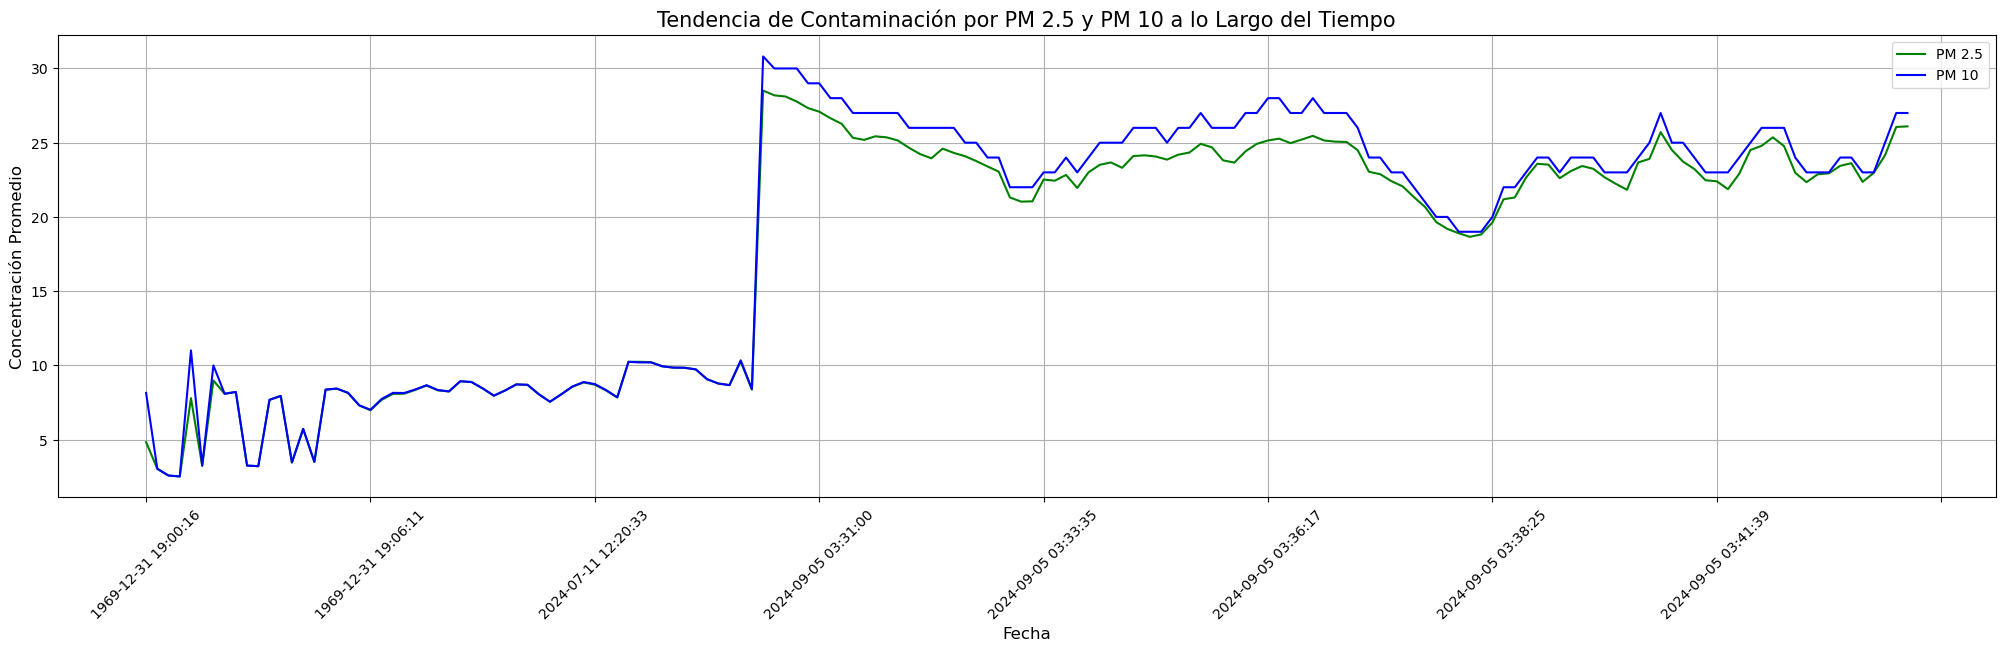

In [75]:

pdf_cubo = df_cubo1.toPandas()
pdf_cubo = pdf_cubo.dropna()
pdf_cubo=pdf_cubo.sort_values(by="time",ignore_index=True)
pdf_cubo=pdf_cubo.iloc[:-1]
# Graficar las tendencias de PM 2.5 y PM 10
plt.figure(figsize=(25, 6))

plt.plot(pdf_cubo["time"], pdf_cubo["Promedio_PM_2.5"], label="PM 2.5", color='green')
plt.plot(pdf_cubo["time"], pdf_cubo["Promedio_PM_10"], label="PM 10", color='blue')

# Títulos y etiquetas
plt.title('Tendencia de Contaminación por PM 2.5 y PM 10 a lo Largo del Tiempo', fontsize=15)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Concentración Promedio', fontsize=12)

# Estilizar la gráfica
plt.legend()
plt.grid(True)

# Formato del eje X

# Reducir la cantidad de ticks en el eje X
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  
plt.xticks(rotation=45)

# Mostrar la gráfica
 
plt.show()


In [76]:
# Agrupar por fecha y hora, contar la frecuencia de valores repetidos 
df_unido.groupBy("time").count().orderBy("count", ascending=False).show()

+-------------------+-----+
|               time|count|
+-------------------+-----+
|1969-12-31 19:00:16|   32|
|1969-12-31 19:00:57|   15|
|1969-12-31 19:01:01|    8|
|1969-12-31 19:00:20|    8|
|1969-12-31 19:02:21|    5|
|2106-02-05 18:28:15|    4|
|1969-12-31 19:00:47|    2|
|1969-12-31 19:01:53|    2|
|1969-12-31 19:01:42|    2|
|1969-12-31 19:00:43|    2|
|1969-12-31 19:01:20|    2|
|1969-12-31 19:01:24|    2|
|1969-12-31 19:01:08|    2|
|1969-12-31 19:07:46|    1|
|2024-09-05 03:31:52|    1|
|2024-09-05 03:42:34|    1|
|2024-09-05 03:36:30|    1|
|2024-09-05 03:32:08|    1|
|2024-09-05 03:39:08|    1|
|2024-09-05 03:42:22|    1|
+-------------------+-----+
only showing top 20 rows



In [78]:

from pyspark.sql.functions import unix_timestamp, col
from pyspark.sql.window import Window


# Definir una ventana para calcular diferencias
window_spec = Window.orderBy("timestamp")
# Convertir la columna de fecha a formato timestamp
df_C = df_cubo2.withColumn("timestamp", unix_timestamp(col("time"), "yyyy-MM-dd HH:mm:ss"))

# Calculcar la diferencia de tiempo
df = df_C.withColumn(
    "diferencia_tiempo",
    col("timestamp") - lag(col("timestamp"),1).over(window_spec)
)

# Seleccionar columnas relevantes y mostrar
df.select("time", "diferencia_tiempo").show()

+-------------------+-----------------+
|               time|diferencia_tiempo|
+-------------------+-----------------+
|               NULL|             NULL|
|1969-12-31 19:00:16|             NULL|
|1969-12-31 19:00:20|                4|
|1969-12-31 19:00:27|                7|
|1969-12-31 19:00:30|                3|
|1969-12-31 19:00:43|               13|
|1969-12-31 19:00:47|                4|
|1969-12-31 19:00:57|               10|
|1969-12-31 19:01:01|                4|
|1969-12-31 19:01:04|                3|
|1969-12-31 19:01:08|                4|
|1969-12-31 19:01:12|                4|
|1969-12-31 19:01:20|                8|
|1969-12-31 19:01:23|                3|
|1969-12-31 19:01:24|                1|
|1969-12-31 19:01:28|                4|
|1969-12-31 19:01:41|               13|
|1969-12-31 19:01:42|                1|
|1969-12-31 19:01:44|                2|
|1969-12-31 19:01:53|                9|
+-------------------+-----------------+
only showing top 20 rows



In [ ]:
df_unido.show()

In [89]:
df_avenidas=df_unido.groupby('Latitude','Longitude','Altitude').agg(
  avg("PM_2_5").alias("Promedio_PM_25"),
  avg("PM 10").alias("Promedio_PM_10")
    ).orderBy('Promedio_PM_10',ascending=False)

In [90]:
df_avenidas.show()

+---------+----------+--------+--------------+--------------+
| Latitude| Longitude|Altitude|Promedio_PM_25|Promedio_PM_10|
+---------+----------+--------+--------------+--------------+
|19.511336|-99.126433|  2242.1|         28.51|         30.81|
|19.511309|-99.126431|  2244.4|         27.77|          30.0|
|19.511336|-99.126433|  2242.2|         28.19|          30.0|
|19.511329|-99.126442|  2242.4|         28.11|          30.0|
|19.511311|-99.126433|  2244.8|         27.33|          29.0|
|19.511309|-99.126427|  2243.8|         27.09|          29.0|
|19.511259|-99.126469|  2249.8|         25.27|          28.0|
|   2243.8|       0.0|   327.7|         26.65|          28.0|
|19.511274| -99.12647|     0.0|         25.46|          28.0|
|19.511296|-99.126422|  2243.5|         26.27|          28.0|
|19.511283|-99.126474|  2250.1|         25.15|          28.0|
|19.511178|-99.126491|  2254.7|         25.19|          27.0|
|19.511006| -99.12579|     0.0|         26.06|          27.0|
|19.5112

In [91]:
df_av=df_avenidas.toPandas()

In [92]:
df_av=df_av.dropna()

In [101]:
import folium
from folium.plugins import HeatMap
import folium
from folium.plugins import HeatMap

# Filtrar valores válidos (sin nulos)
df_av = df_av.dropna(subset=['Latitude', 'Longitude', 'Promedio_PM_10'])

# Crear una lista de puntos con latitud, longitud y el peso de contaminación
contaminacion = df_av[['Latitude', 'Longitude', 'Promedio_PM_10']].values.tolist()

# Crear un mapa base centrado en Ciudad de México
mapa_calor = folium.Map(location=[19.511336, -99.126433], zoom_start=20)

# Añadir capa de mapa de calor
HeatMap(contaminacion, radius=15, blur=10, max_zoom=1).add_to(mapa_calor)

# Guardar el mapa como archivo HTML (opcional)
#mapa_calor.save("mapa_calor.html")

# Mostrar el mapa
mapa_calor


In [102]:
mapa_calor.save("mapa_calor_f.html")

In [95]:
df_av

,Latitude,Longitude,Altitude,Promedio_PM_25,Promedio_PM_10
0,1.951134e+01,-99.126433,2242.10,28.510,30.810
1,1.951133e+01,-99.126442,2242.40,28.110,30.000
2,1.951131e+01,-99.126431,2244.40,27.770,30.000
3,1.951134e+01,-99.126433,2242.20,28.190,30.000
4,1.951131e+01,-99.126433,2244.80,27.330,29.000
...,...,...,...,...,...
115,2.024071e+13,0.000000,0.00,3.500,3.500
116,2.024071e+13,19.503915,-99.15,3.250,3.250
117,-9.914698e+01,2240.100000,0.00,3.250,3.250
118,2.024040e+05,2223.800000,0.00,3.240,3.240
